In [1]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=0659eed322b1e94066d138d35490871a662a600cedb05dd946f501ee967f53e3
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [21]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import nsepy
import matplotlib.pyplot as plt

# Load the data
data = nsepy.get_history(symbol='RELIANCE', start=pd.to_datetime('2021-01-01'), end=pd.to_datetime('2021-12-21'))
closing_prices = data['Close'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices = scaler.fit_transform(closing_prices)

# Split the data into train and test sets
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[0:train_size,:], closing_prices[train_size:len(closing_prices),:]

# Reshape the data for LSTM model
look_back = 2
train_X, train_Y = np.array([train[i:(i+look_back), 0] for i in range(len(train)-look_back)]), np.array([train[i+look_back, 0] for i in range(len(train)-look_back)])
test_X, test_Y = np.array([test[i:(i+look_back), 0] for i in range(len(test)-look_back)]), np.array([test[i+look_back, 0] for i in range(len(test)-look_back)])

train_X, test_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1)), np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predict, test_predict = scaler.inverse_transform(model.predict(train_X)), scaler.inverse_transform(model.predict(test_X))
test_Y=scaler.inverse_transform(test_Y.reshape(-1,1))

Epoch 1/50
190/190 [==============================] - 2s 3ms/step - loss: 0.0276
Epoch 2/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 3/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 4/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 5/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 6/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 7/50
190/190 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 8/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 9/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 10/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 11/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 12/50
190/190 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 13/50
190/190 [====

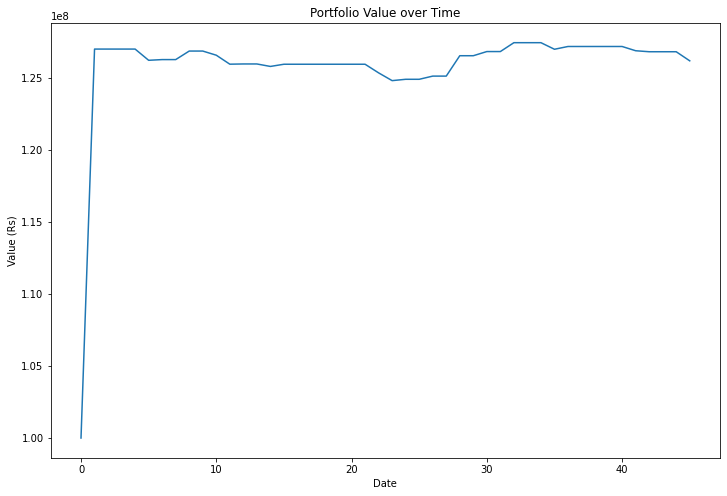

In [23]:
# Initialize portfolio
initial_investment=100000000
portfolio_value = initial_investment
holdings = 10000
numshares=holdings
# Initialize lists for portfolio value and profits
portfolio_values = [portfolio_value]
profits = []

# Iterate over each day in the test set
for i in range(len(test_predict)-1):

    predicted_price, current_price = test_predict[i][0], test_Y[i]



    # Calculate the change in price and update the portfolio
    price_delta = predicted_price - current_price[0]
    if price_delta > 0:
        # Buy
        if holdings==0:

           
           portfolio_value -= numshares* current_price[0]
           holdings = numshares

        else: 

          pass             


    elif price_delta < 0:
        # Sell
       if holdings>0:
          
        
           portfolio_value += numshares * current_price[0]
           holdings-=numshares
           

       else:

             pass
        
    # Update portfolio value and profits
    portfolio_values.append(portfolio_value + holdings * current_price[0])
    profits.append(portfolio_values[-1] - initial_investment)

# Plot portfolio value and profits
plt.figure(figsize=(12, 8))
plt.plot(portfolio_values)
plt.title("Portfolio Value over Time")
plt.xlabel("Date")
plt.ylabel("Value (Rs)")
plt.show()

In [24]:
print("Final Portfolio Value: Rs", portfolio_values[-1])

Final Portfolio Value: Rs 126188000.0


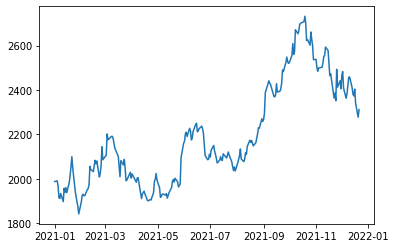

In [25]:
plt.plot(data['Close'])